# Practice 4: Traditional Classificaiton Methods

Use this notebook as the starting point for the Practice activities.

Student Name:    **[  Put your Name Here ]**




## Revisit the Iris classification problem

*Note: This description comes from [Google's Custom Training Walkthroughs](https://www.tensorflow.org/tutorials/eager/custom_training_walkthrough).*

Imagine you are a botanist seeking an automated way to categorize each Iris flower you find. Machine learning provides many algorithms to classify flowers statistically. For instance, a sophisticated machine learning program could classify flowers based on photographs. Our ambitions are more modest—we're going to classify Iris flowers based on the length and width measurements of their [sepals](https://en.wikipedia.org/wiki/Sepal) and [petals](https://en.wikipedia.org/wiki/Petal).

The Iris genus entails about 300 species, but our program will only classify the following three:

* Iris setosa
* Iris virginica
* Iris versicolor

<table>
  <tr><td>
    <img src="https://www.tensorflow.org/images/iris_three_species.jpg"
         alt="Petal geometry compared for three iris species: Iris setosa, Iris virginica, and Iris versicolor">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://commons.wikimedia.org/w/index.php?curid=170298">Iris setosa</a> (by <a href="https://commons.wikimedia.org/wiki/User:Radomil">Radomil</a>, CC BY-SA 3.0), <a href="https://commons.wikimedia.org/w/index.php?curid=248095">Iris versicolor</a>, (by <a href="https://commons.wikimedia.org/wiki/User:Dlanglois">Dlanglois</a>, CC BY-SA 3.0), and <a href="https://www.flickr.com/photos/33397993@N05/3352169862">Iris virginica</a> (by <a href="https://www.flickr.com/photos/33397993@N05">Frank Mayfield</a>, CC BY-SA 2.0).<br/>&nbsp;
  </td></tr>
</table>

Fortunately, someone has already created a [data set of 120 Iris flowers](https://en.wikipedia.org/wiki/Iris_flower_data_set) with the sepal and petal measurements. This is a classic dataset that is popular for beginner machine learning classification problems.



## Setting up Python tools



We'll use three libraries for this tutorial: 
- [pandas](http://pandas.pydata.org/) : dataframes for spreadsheet-like data analysis, reading CSV files, time series
- [numpy](http://www.numpy.org/) : for multidimensional data and linear algebra tools
- [matplotlib](http://matplotlib.org/) : Simple plotting and graphing
- [seaborn](http://stanford.edu/~mwaskom/software/seaborn/) : more advanced graphing




In [0]:
# First, we'll import pandas and numpy, two data processing libraries
import pandas as pd
import numpy as np

# We'll also import seaborn and matplot, twp Python graphing libraries
import seaborn as sns
import matplotlib.pyplot as plt
#sns.set(style="white", color_codes=True)

# We will turn off some warns in this notebook to make it easier to read for new students
import warnings
warnings.filterwarnings('ignore')

## Read in the Iris flower data
The Iris flower data is read in from a file stored on the internet
<p>
It is stored in a Pandas DataFrame which is similar to an internal spreadsheet in that the data is stored in rows and columns.

In [0]:
# Read in the data file from stored in a raw file in GitHub
url = 'https://raw.githubusercontent.com/CIS3115-Machine-Learning-Scholastica/CIS3115ML-Units1and2/master/Iris.csv'
iris = pd.read_csv(url)
# Set the Id column as the index since it is unique for each flower
iris.set_index('Id', inplace=True)

In [33]:
# Display the first 5 flowers to make sure the data was read in
iris.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


When we use machine learning models, we will general use these variables
- X will be the input data, in this case the size of the flower's sepal and petals
- y will be the out data or what we want to predict, in this case the species of iris

One way to this of this, is that on the graphs above the x-axis is the house size and the y-axis is the price.

We will also break the data using 80% of the flower samples for training the model and keeping 20% for testing the model

- X_train : The iris sizes used for training the model
- X_test : The iris sizes used for testing the model
- y_train : The species used for training the model
- y_test : The species used for testing the model

We will only use the training data for fitting the model.


In [0]:
# Use the first four collumn for input into the model and the final iris label as output for training
X = iris.iloc[:, 0:4]
y = iris.iloc[:, 4]

# feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
# X = dataset[feature_columns].values
# y = dataset['Species'].values

from sklearn.model_selection import train_test_split
# Split the data into 80% for training and 20% for testing out the models
X_train, X_test, y_train, y_test = train_test_split(X, y.ravel(), test_size=0.2)

# Classifiers
We will try out a couple traditional classifiers and compare them.
<P>
For a good comparison of classifiers see http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py
<P>
We will focus on
    - K-Nearest Neighbors or from sklearn.neighbors import KNeighborsClassifier
    - Support Vector Machines (SVM) or from sklearn.svm import SVC
    - Decision Trees or from sklearn.tree import DecisionTreeClassifier
    - Logistic Regression or from sklearn.linear_model import LogisticRegression
Note, in the next unit we will revisit these adding deminsional reduction methods like PCA or LDA 
    

## K-Nearest Neighbors (KNN)

We will now set up linear regression model and train it to predict house prices.

We will use the [scikit-learn](https://scikit-learn.org/stable/index.html) (sklearn) library for our [regression model](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html)


We create a regression model and then use the data to train or fit the regression to the data. 

## Task 1: Applying K-Nearest Neighbors

Using the graph above which plots data related to Apples and Oranges, determine the following by k-nearest neighbors and either visual inspection or simple measuring:
1.	The classification of the x at  (18.8,4.9) when k = 1:	•Apple	• Orange	• Neither
1.	The classification of the x at  (18.8,4.9) when k = 3: 	•Apple	• Orange	• Neither
1.	The classification of the x at  (18.8,4.9) when k = 5: 	•Apple	• Orange	• Neither



## Task 2: Predictions with Regression

- Question : Using the regression_model above, generate predictions for a 4,000 sq ft house and a 6,000 sq ft house. Compare these predicitons to what you estimated in Task 1.

  
---
*Double-click on this cell to put your answer here...*

In [52]:
from sklearn.neighbors import KNeighborsClassifier
# Set up the K-Nearest neighbor model using the 5 nearest neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
# Train the model on the iris data
knn_model.fit(X_train, y_train)
score = knn_model.score(X_test, y_test)
print ("The score for this model is ", score)

The score for this model is  0.9666666666666667


## Task 2: Try out different values of N 

- Question : It is dependent on the data which value of N should be used in K-Nearest Neighbors. Maybe you should only look at the nearest neighbor, so N=1. But generally it is better to look at a number of neighbors

  
---
*Double-click on this cell to put your answer here...*

### Prediction
Once we have trained or fit the model to the data, we can use it to make predictions.

Here we will predict the iris species for a new flower with 
- SepalLengthCm = 5.2	
- SepalWidthCm = 3.3
- PetalLengthCm = 1.4
- PetalWidthCm	= 0.2
This should be a Iris-setosa

In [48]:
prediction = knn_model.predict([[5.2, 3.3, 1.4, 0.2]])
print ("Predicted iris species is ", prediction)


Predicted iris species is  ['Iris-setosa']


## SVM

In [50]:
from sklearn.svm import LinearSVC, SVC

# Set up the K-Nearest neighbor model using the 5 nearest neighbors
svm_model = LinearSVC()      # linear SVM
svm_model = SVC()            # non-linear SVM
# Train the model on the iris data
svm_model.fit(X_train, y_train)
score = svm_model.score(X_test, y_test)
print ("The score for this model is ", score)

The score for this model is  1.0


## Task 2: Predictions with Regression

- Question : Using the regression_model above, generate predictions for a 4,000 sq ft house and a 6,000 sq ft house. Compare these predicitons to what you estimated in Task 1.

  
---
*Double-click on this cell to put your answer here...*

In [37]:
score = knn.score(X_test, y_test)
print ("The score is ", score)

The score is  0.9666666666666667


### Score evaluation

Regression models are scored with the coefficient of determination R^2 of the prediction. The higher the score the better. A score of 1.0 is the best score while a score of 0.0 is very bad.

Our model should scored between **0.45 and 0.49 **which is OK, but not great.

## Task 3: Improve model  

In the model above we used the size of the house, `sqft_living`, to train the model and got a score of 0.49.

### Part 1:
You must try two different features and see if they improve the score of the model. You can choose between the following to use instead of `sqft_living`

 - bedrooms
 - bathrooms
 - sqft_living
 - sqft_lot
 - floors
 - condition
 - grade
 - sqft_above
 - sqft_basement
 - yr_built
 - zipcode 
 
You can make your changes in the two code cells below.

### Part 2:

In full sentences, try to describe what the code in the first cell below does. Include a description of what each line of code does and why it is important. 

---
*Put your code description here*

In [0]:
# Trial 1 of a new variable
# replace 'sqft_living' with the parameter of your choice
X = house_df['zipcode'].values.reshape(-1, 1) 
y = house_df['price'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Train the model using the training data
regression_model.fit(X_train, y_train)
# Score the model with the test data
score = regression_model.score(X_test, y_test)
print ("The score is ", score)

The score is  -0.012061977531196533


In [0]:
# Trial 2 of a new variable
# replace 'sqft_living' with the parameter of your choice
X = house_df['sqft_living'].values.reshape(-1, 1) 
y = house_df['price'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Train the model using the training data
regression_model.fit(X_train, y_train)
# Score the model with the test data
score = regression_model.score(X_test, y_test)
print ("The score is ", score)

The score is  0.4388755770874106


## Bonus Challenge - Use the correlation to choose parameters

You can use the correlation graphs or the correlation coefficients to help you select what features to use to predict the house price.

The first chart shows all the correlation coefficients. The first row or column shows the correlations with price. You should be looking for features with high positive or negative values  

The second set of scatter charts show the correlation between the different variables. Again the first row or column shows the correlations with the house price.



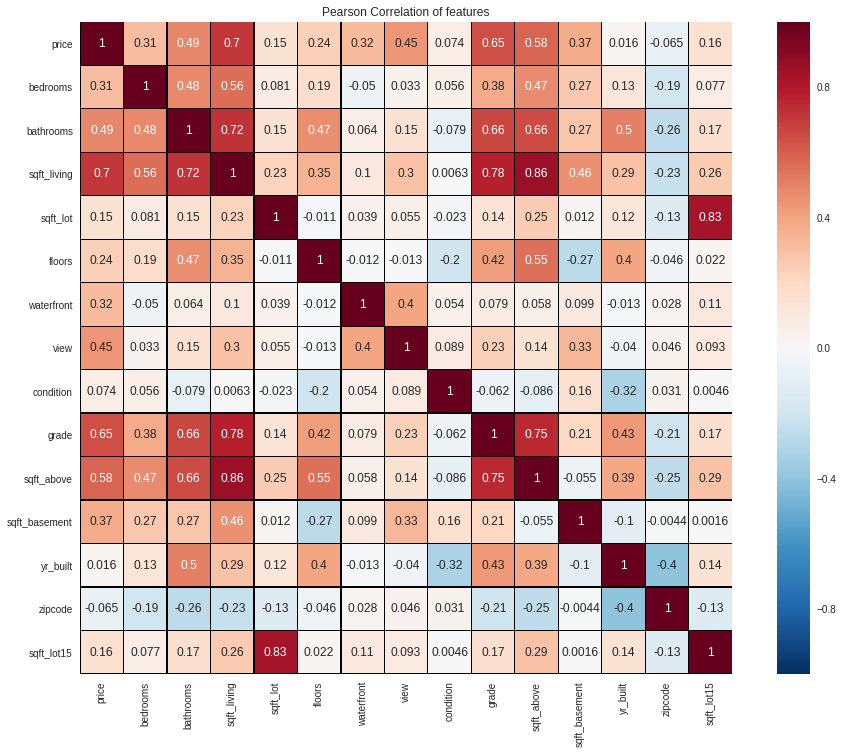

In [0]:
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation of features')
sns.heatmap(house_df.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, linecolor='k', annot=True)

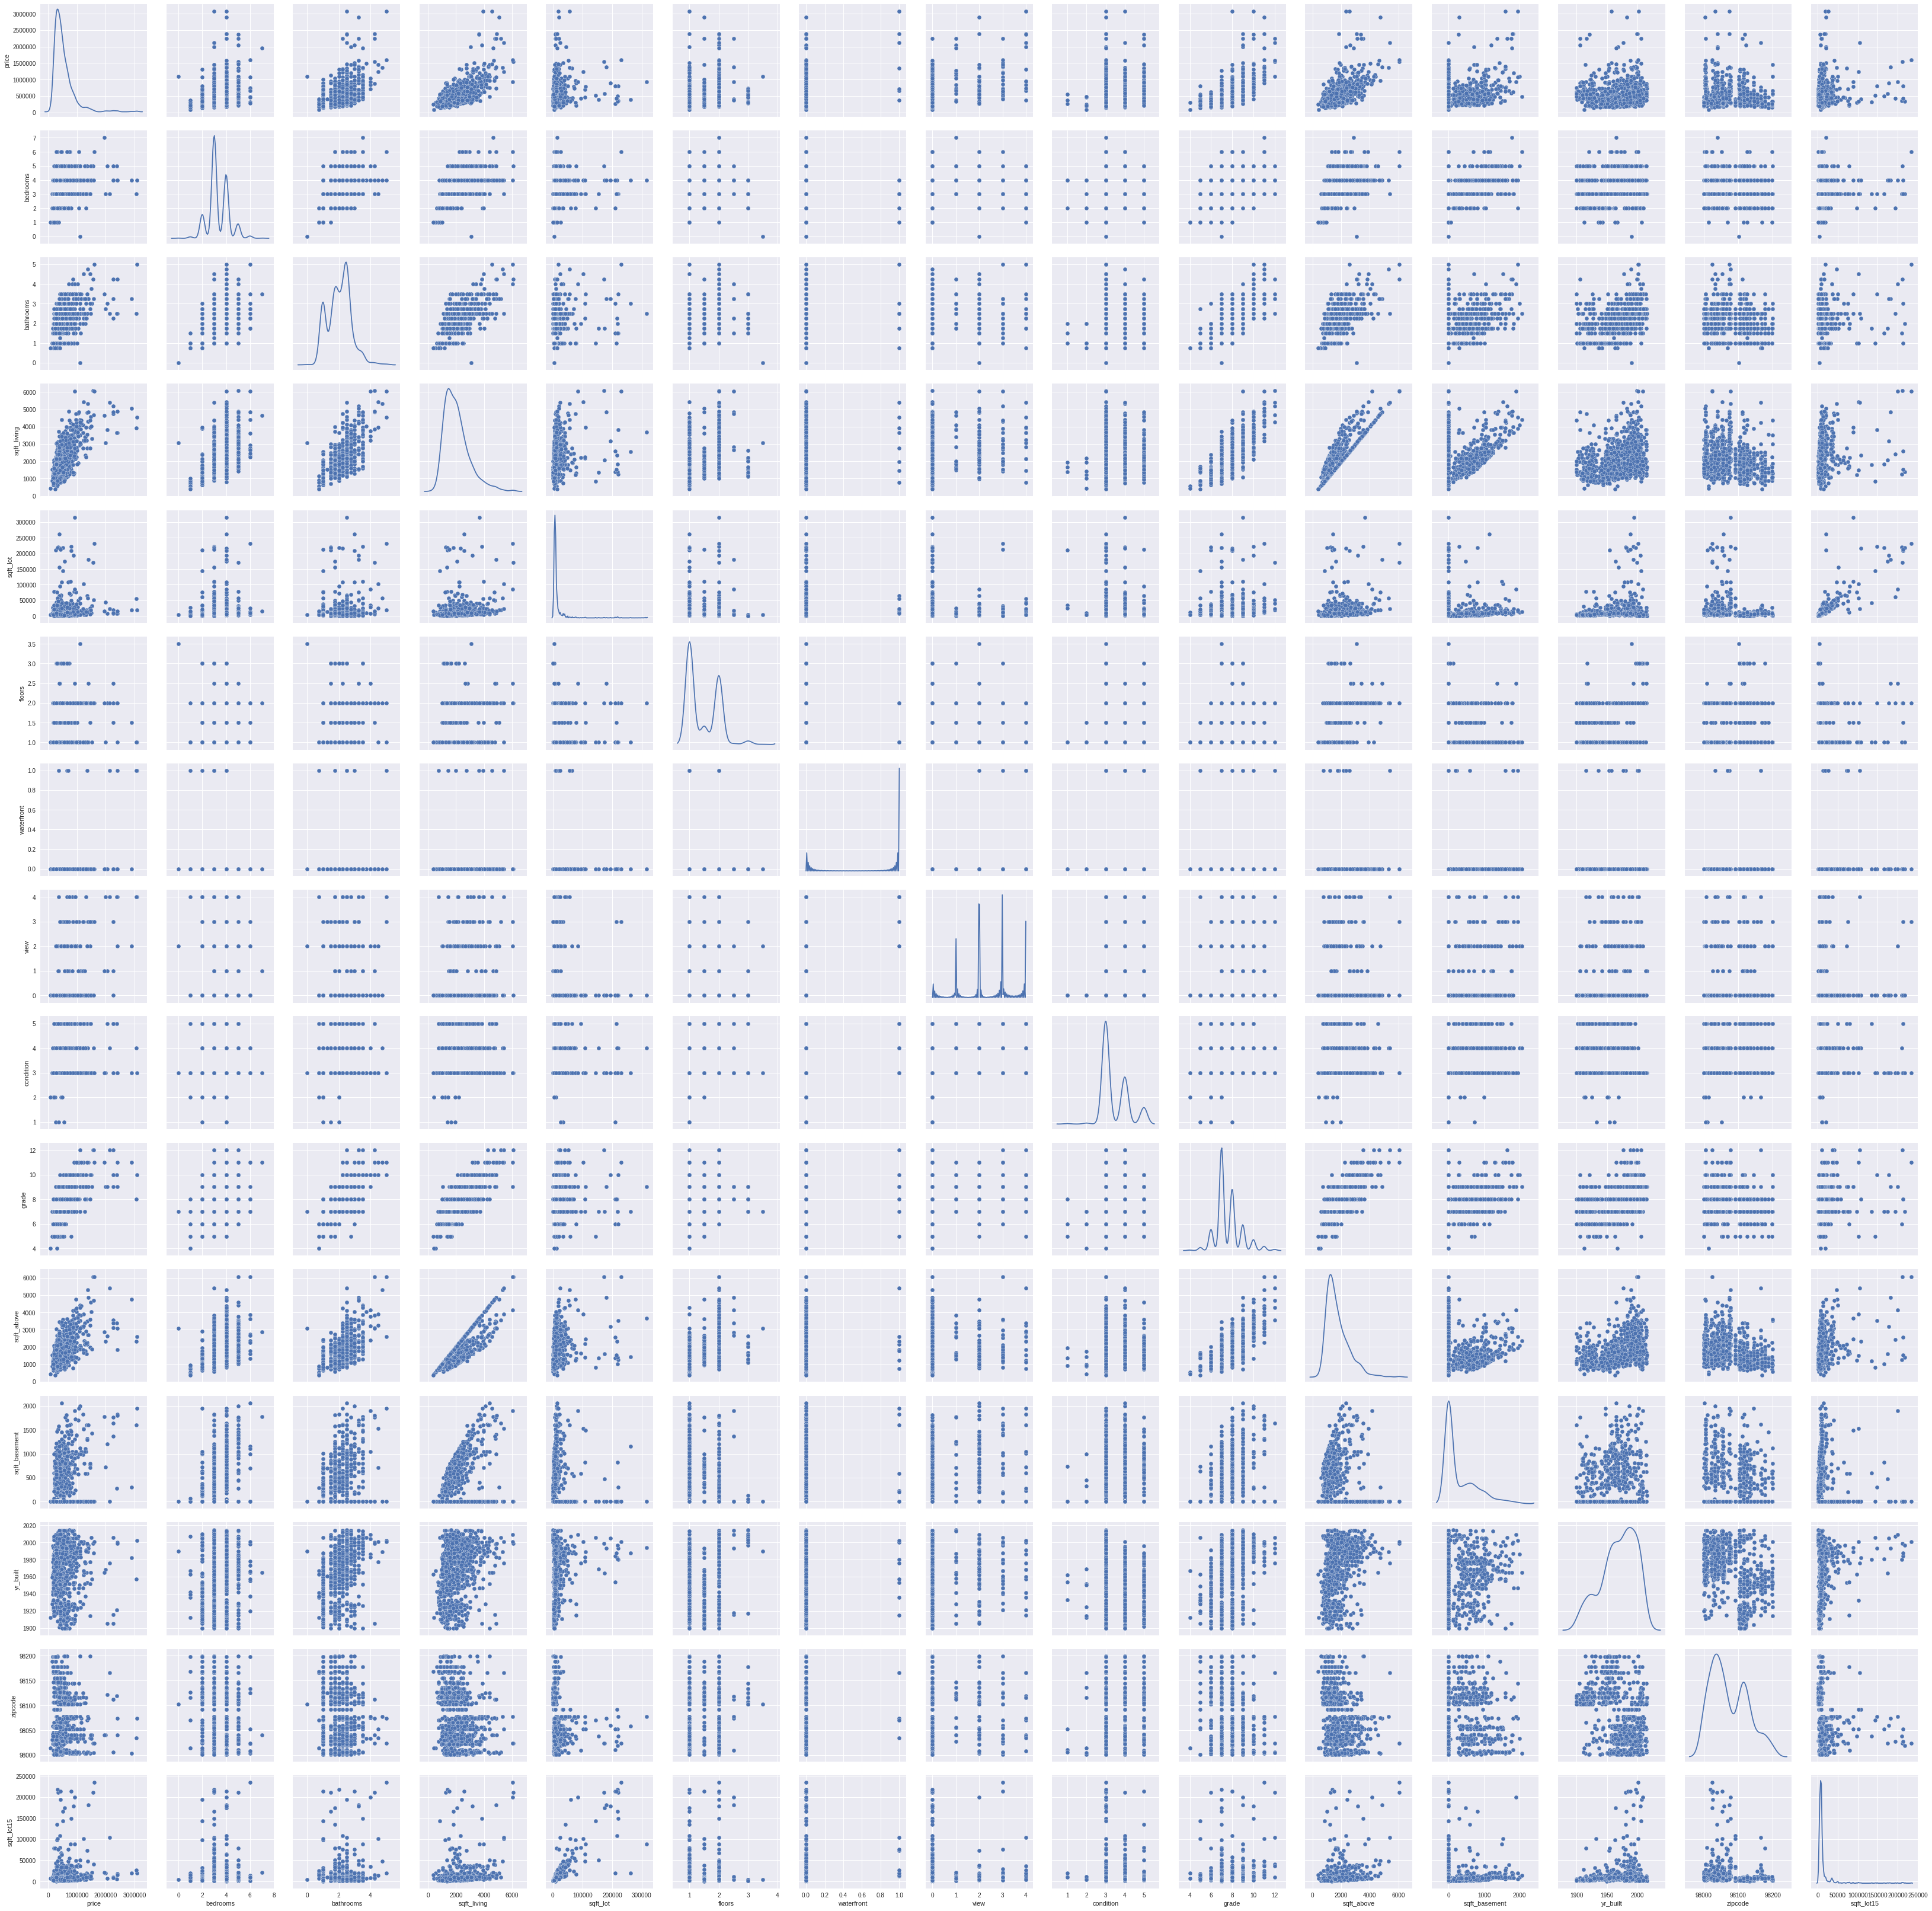

In [0]:
sns.pairplot(house_df, size=3, diag_kind="kde")

 ### Multi-dimensional linear regression
After looking at the correlations above, select 3-4 features to use in a new multi-dimensional linear regression. This version uses a list of features which you can modify 

```
params = ['sqft_living', 'floors', 'waterfront']
```
So modify this line in the code cell below and try to improve the model's score.


In [0]:
# Trial of multiple variables for the regressions
# replace 'sqft_living' with the parameter of your choice
params = ['sqft_living', 'floors', 'waterfront']
X = house_df[params].values.reshape(-1, len(params)) 
y = house_df['price'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Train the model using the training data
regression_model.fit(X_train, y_train)
# Score the model with the test data
score = regression_model.score(X_test, y_test)
print ("The score is ", score)

The score is  0.518156066870927


## Using all the features 

If combining more than one feature can improve the predictions from linear regression, why don't we just use all of them?

The following cell copies all the features in the `house_df` dataframe into a new dataframe named `features_df`. This is used to train the linear regression model. 



In [0]:
# Trial using all the features
# features_df = house_df
features_df = house_df.drop('price', axis=1)

X = features_df.values.reshape(-1, features_df.shape[1]) 
y = house_df['price'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Train the model using the training data
regression_model.fit(X_train, y_train)
# Score the model with the test data
score = regression_model.score(X_test, y_test)
print ("The score is ", score)

The score is  0.670236363385723


## Task 4: Final Regression Model

### Part 1: Finding the error

When the code above runs using all the features it scores 1.0 which means it can perfectly predict the house price given the features. This does not seem possible...


---

*Describe here why you think a model should not be able to predict with 100% accruacy the house price from the house features. *


---


### Part 2: Fixing the error

When the code above runs it includes the price in the features used to predict the price. This is an error--we don't want to give the model the price if we are asking it to predict the price.  

So change this line 

```
features_df = house_df
```

to this 

```
features_df = house_df.drop('price', axis=1)
```

The `drop` method will remove the price from the `features_df` dataframe and train the model using all the remaining features.

Run the fixed code three times, noting the score each time.


---

*Write the three scores from the final version here.*

*Also, describe why you are getting slightly different answers each time. Where does the randomness come from in this model?*


## Wrapping Up

Remember to share this sheet with your instructor and submit a link to it in Blackboard.